In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as exp

data = pd.read_csv('BX-Users.csv')


#---katharismos tou column location gia na meinei mono h xwra---
for x in range(len(data)):
    my_str = data.loc[x,"location"]
    new_val= my_str[my_str.rfind(','):]
    data.loc[x,"location"] = new_val[1:len(new_val)]
    # clear people above 110 age
    if data.loc[x,"age"] >110:
        data.drop(x,axis=0,inplace=True)


data.head()

,uid,location,age
0,1,usa,NaN
1,2,usa,18.0
2,3,russia,NaN
3,4,portugal,17.0
4,5,united kingdom,NaN


In [23]:
ages = data.age.value_counts()
#print(countries)


#---katharismos twn countries kathws uphrxan mesa mi uparktes xwres.---
unique_countries = data['location'].unique()
#arxikos arithmos xwrwn
print("Xwres prin to katharisma: ", len(unique_countries))



Xwres prin to katharisma:  645


In [24]:
for country in unique_countries:  
    if len(data[data['location'] == country]) < 15 :
        #print(country, "with entries ", len(data[data['location'] == country]), "DROPPED")
        data.drop(data.loc[data['location'] == country].index, inplace = True) 




Xwres meta to katharisma:  127


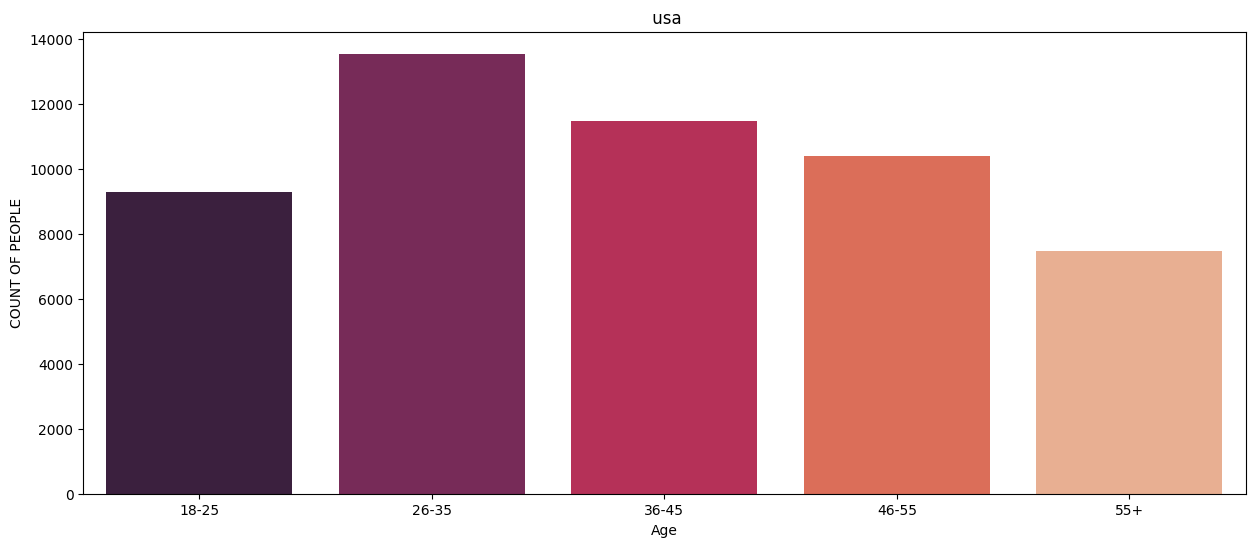

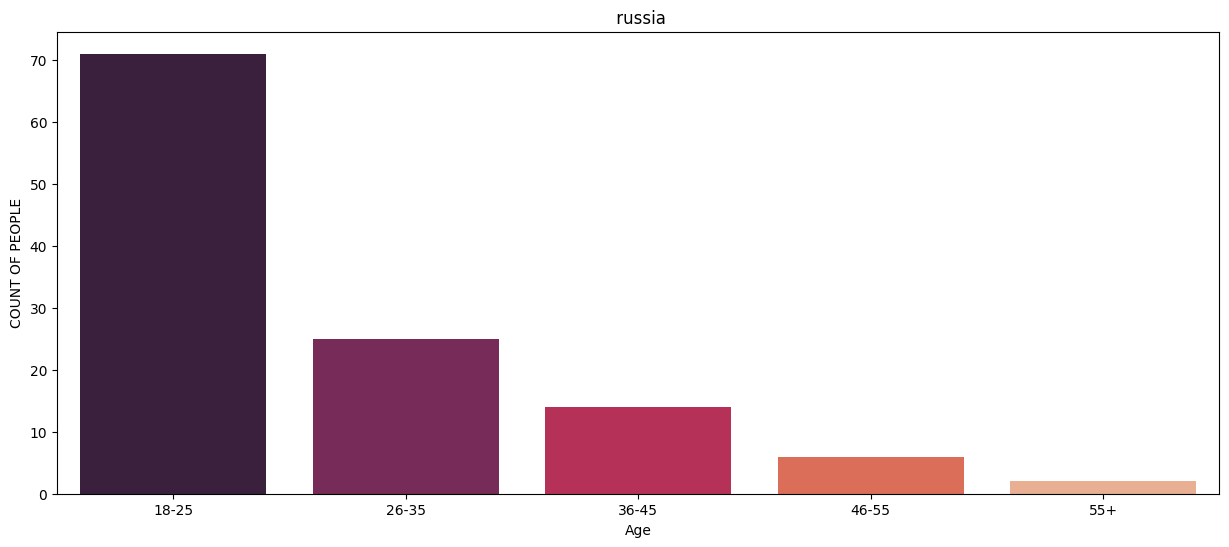

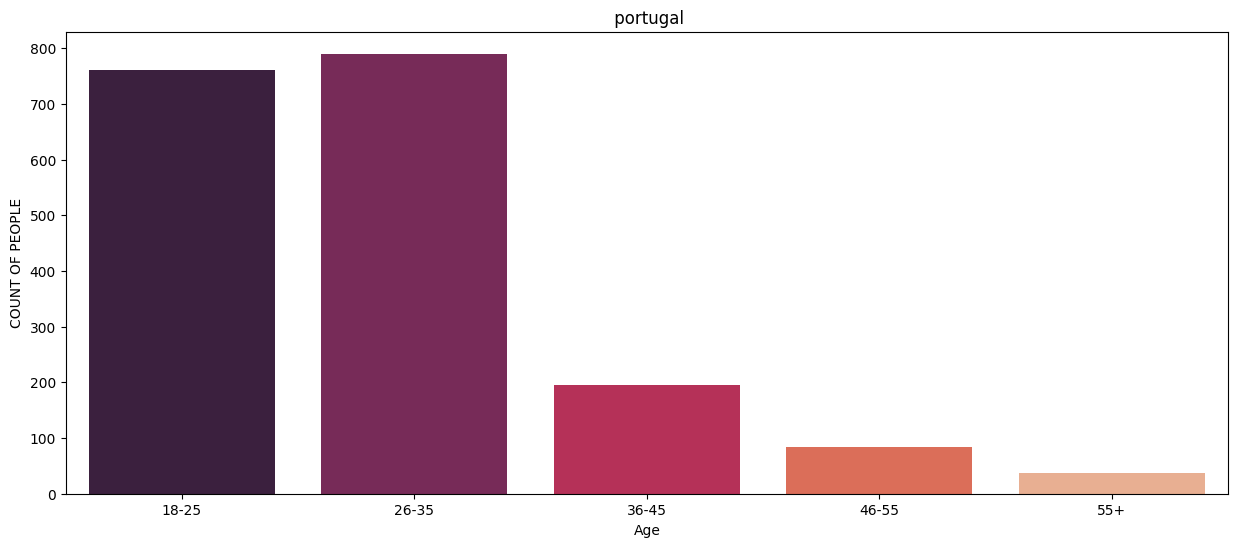

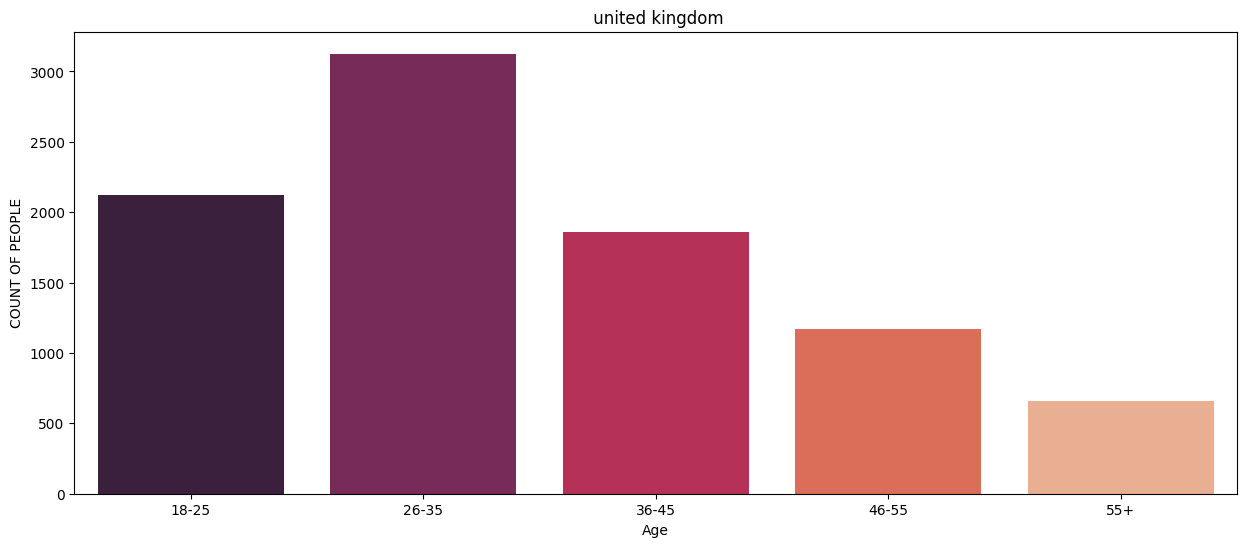

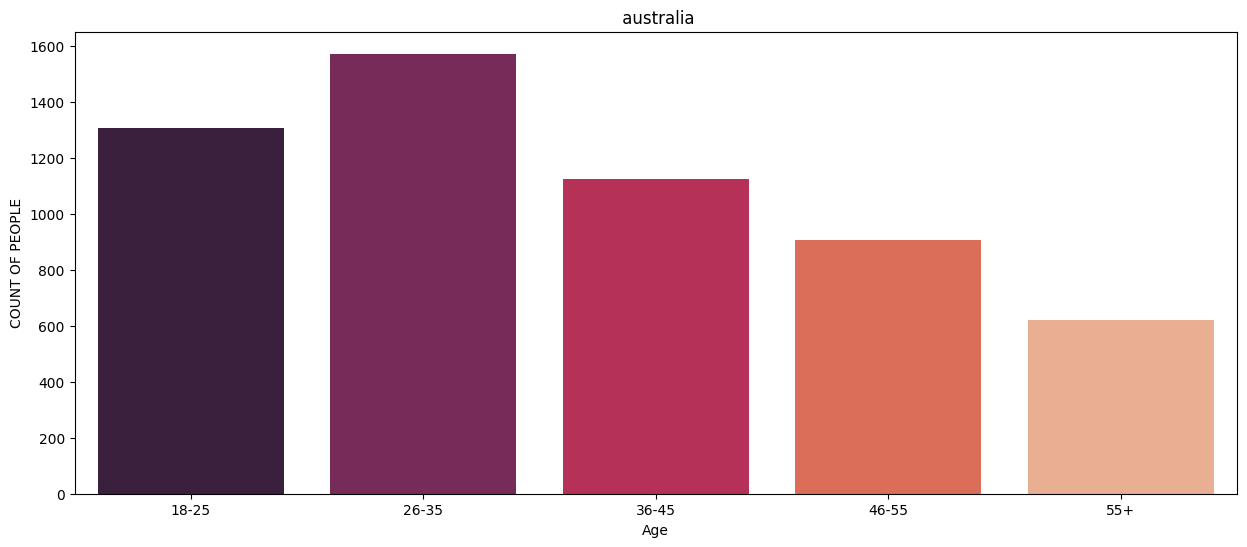

In [63]:
unique_countries = data['location'].unique()
print("Xwres meta to katharisma: ", len(unique_countries))
#print(unique_countries)

data['location'] = data['location'].astype(str)

#print(data.location.value_counts())

#VRIKA POS MPORO NA EXV OLEW TIS HLIKIEW MONO GIA MIA XWRA TORA LOGIKA THA KANW CLUSTER ETSI MIA MIA

#for country in unique_countries:
#   print(len(data[data['location'] == country]['age'].values))
#
#  data[data['location'] == ' usa']['age']

def makePlot(number): 

    for x in range(number):
        country = unique_countries[x]
        age18_25 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 25) & (data[data['location'] == country]['age'] >= 18)]
        age26_35 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 35) & (data[data['location'] == country]['age'] >= 26)]
        age36_45 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 45) & (data[data['location'] == country]['age'] >= 36)]
        age46_55 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 55) & (data[data['location'] == country]['age'] >= 46)]
        age55above = data[data['location'] == country]['age'][data[data['location'] == country]['age'] >= 56]

        x = ["18-25","26-35","36-45","46-55","55+"]
        y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

        plt.figure(figsize=(15,6))
        sns.barplot(x=x, y=y, palette="rocket")
        plt.title(country)
        plt.xlabel("Age")
        plt.ylabel("COUNT OF PEOPLE")
        plt.show()  

makePlot(5)


      

